In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

init_printing()
x, y, z = symbols('x,y,z')
n, m = symbols('n,m', integer=True)

%matplotlib inline
%load_ext exercise

# Numeric Evaluation

In this section we'll learn how to use our symbolic equations to drive numeric computations

## `.subs` and `.evalf`

The simplest (and slowest) ways to evaluate an expression numerically is with the `.subs` and `.evalf` methods 

In [2]:
sin(x)

In [3]:
sin(x).subs({x: 0})

In [4]:
acos(x).subs({x: -1})

In [5]:
acos(x).subs({x: -1}).evalf()

In [6]:
acos(x).subs({x: -1}).evalf(n=100)

### Exercise

In a previous section we computed the following symbolic integral

$$ \int_y^z x^n dx $$

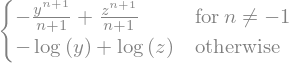

In [7]:
result = integrate(x**n, (x, y, z))
result

Use `.subs` and a dictionary with keys `n, y, z` to evaluate this result when 

    n == 2
    y == 0
    z == 3

In [ ]:
# Evaluate the resulting integral on the above values


### Exercise

Write a function that takes a symbolic expression (like `pi`), and determines the first place where `999999` appears.

Tip: Use the string representation of the number. You can take the part after the `.` by using `split('.', 2)[1]`.

In [ ]:
'1.2345'.split('.', 2)[1]

And remember that Python starts counting at `0`, so if you use `str.find`, you'll need to add one.

In [ ]:
str(1.2345).split('.', 2)[1].find('345')

In [ ]:
str(1.2345).split('.', 2)[1].find('345') + 1

And remember that `str.find` returns `-1` if it cannot find the string.

In [ ]:
'abcd'.find('def')

In [8]:
def find_999999(expr, limit=100000):
    """
    Find the first place in the decimal expr where 999999 appears.

    Only checks up to limit digits.

    Returns False when 999999 does not appear.

    >>> find_999999(pi)
    762
    >>> find_999999(E)
    False
    >>> find_999999(E, 1000000) # This one will take a few seconds to compute
    384340
    """
    # index where 999999 appears
    found = str(expr.evalf(limit)).split('.', 2)[1].find('999999') + 1  # EXERCISE: str(expr.evalf(limit)).split('.', 2)[1].find('999999') + 1
    if found == 0:  # EXERCISE: 0
        return False
    return found


In [9]:
find_999999(pi)

In [10]:
find_999999(E)

False

## `lambdify`

The `.subs` and `.evalf` methods are great for when you want to evaluate an expression at a single point.  When you want to evaluate your expression on lots of points they quickly become slow. 

To resolve this problem SymPy can rewrite its expressions as normal Python functions using the `math` library, vectorized computations using the NumPy library, C or Fortran Code using code printers, or even more sophisticated systems.

In [11]:
# function = lambdify(input, output)
f = lambdify(x, x**2)
f(3)

In [12]:
f = lambdify(x, x**2, 'numpy')  # Use numpy backend
data = np.array([1, 2, 3, 4, 5])
f(data)

array([ 1,  4,  9, 16, 25])

### Exercise

We will look at an arbitrary expression $f(x, y)$:

$$
f(x, y) = 3 x^{2} + \log{\left (x^{2} + 1 \right )}
$$

In [13]:
expr = 3*x**2 + log(x**2 + 1)
expr

Create a function, `f`, that evaluate this expression using the `'numpy'` backend

In [14]:
# Create Numpy function mapping x to expr with the numpy backend
f = lambdify(x, expr, modules='numpy')

We can plot your function from $x \in [0, 5]$ with the following numpy/matplotlib code

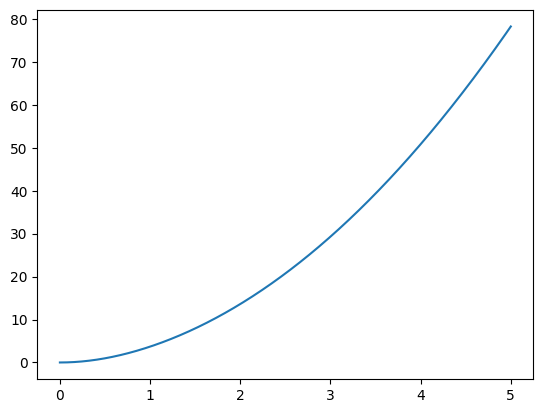

In [17]:
nx = np.linspace(0, 5, 1000)
plt.plot(nx, f(nx));

### Exercise

Create a numpy function that computes the derivative of our expression.  Plot the result.

In [ ]:
# %exercise exercise_plotting.py
# differentiate the expression
expr_d = ???
f2 = lambdify(???)
plt.plot(???);